# **Titanic Survival**

This is my 1st run through of the titanic data set. There are many walkthroughs and tons of example code available for this dataset but this attempt will be done without using those 1st.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Read in the training dataset from Kaggle.com
df = pd.read_csv('/kaggle/input/titanic/train.csv')

In [3]:
#Having a look at the 1st rows of the dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Having a look at the last rows of the data
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


1st impressions are that there is missing data for cabin info and ages. 

In [5]:
#Let's check the integrity of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Data is missing for approximately 180 ages but around 700 cabins everything else appears intact.

In [6]:
#Let's see some statistics on the data
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


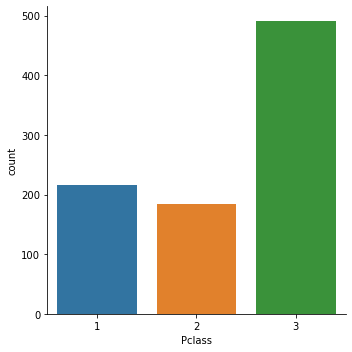

In [7]:
#I'd like to visualise the breakdown of passengers by class
sns.catplot(data=df,x='Pclass',kind='count')

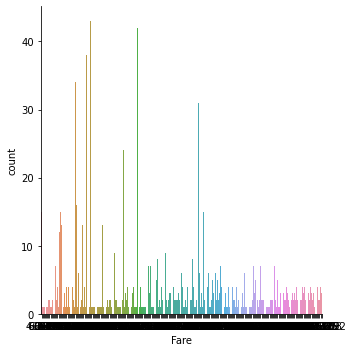

In [8]:
sns.catplot(data=df, x='Fare', kind='count')

So even though there are only 3 classes, there are a large number of different fares paid by the passengers.

<AxesSubplot:xlabel='Fare', ylabel='Age'>

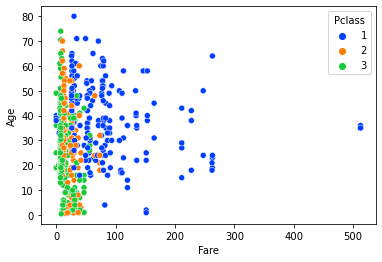

In [9]:
sns.scatterplot(data=df, x='Fare',y='Age',hue='Pclass',palette='bright')

<AxesSubplot:>

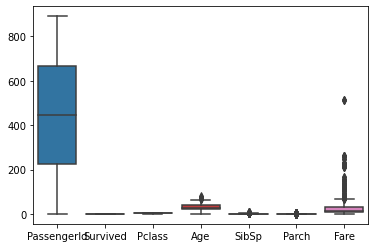

In [10]:
sns.boxplot(data=df)

<AxesSubplot:>

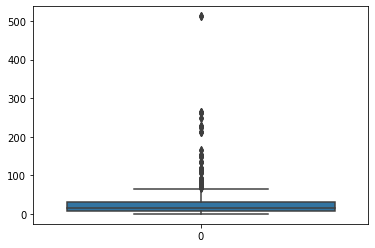

In [11]:
#I want to see if there is an anomoly in the Fare data, do we need to clean it?
sns.boxplot(data=df['Fare'])

In [12]:
#Lets have a look specifically at the higher paying passengers
df[df.Fare > df.Fare.quantile(.95)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.00,3,2,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.00,3,2,19950,263.0000,C23 C25 C27,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.00,0,1,PC 17558,247.5208,B58 B60,C
195,196,1,1,"Lurette, Miss. Elise",female,58.00,0,0,PC 17569,146.5208,B80,C
215,216,1,1,"Newell, Miss. Madeleine",female,31.00,1,0,35273,113.2750,D36,C
258,259,1,1,"Ward, Miss. Anna",female,35.00,0,0,PC 17755,512.3292,NaN,C
268,269,1,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.00,0,1,PC 17582,153.4625,C125,S
269,270,1,1,"Bissette, Miss. Amelia",female,35.00,0,0,PC 17760,135.6333,C99,S
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S


There appear to be multiple people in the same cabins paying the same fare.

In [13]:
#The max fare as found earlier was 512.3292, how many paid this fare?
df[df.Fare == 512.3292]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [14]:
#It appears as though multiple passengers on the same ticket are listed as paying the same fare. Lets check.
df[df.Ticket == 'PC 17569']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
195,196,1,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C


The fare paid is not an anomoly but is not 'per person' One family will have each member listed and fare shows price paid for the family.

<AxesSubplot:>

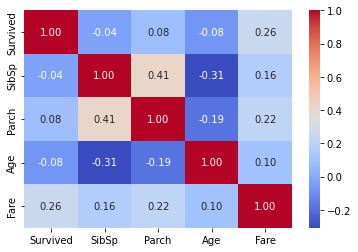

In [15]:
sns.heatmap(df[['Survived', 'SibSp', 'Parch', 'Age', 'Fare']].corr(), annot = True, fmt = '.2f', cmap = 'coolwarm')

The fare has a higher correlation with the survivability and with the Parental indicator which indicates again that families paid for a ticket together and that higher paying passengers were more likely to survive.

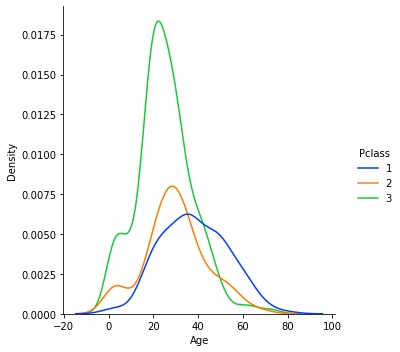

In [16]:
sns.displot(data = df, x = 'Age', hue = 'Pclass',kind='kde',palette='bright')

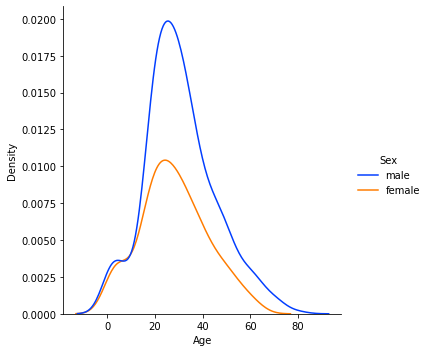

In [17]:
sns.displot(data = df, x = 'Age', hue = 'Sex',kind='kde',palette='bright')

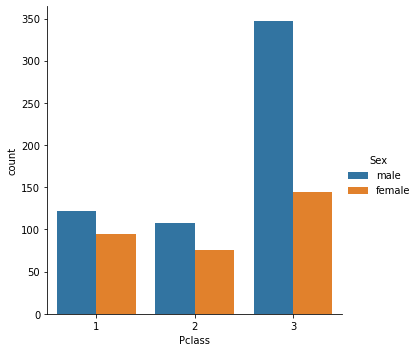

In [18]:
sns.catplot(data = df, x='Pclass', hue='Sex', kind='count')

There are more young adults in 3rd class and more males in 3rd class

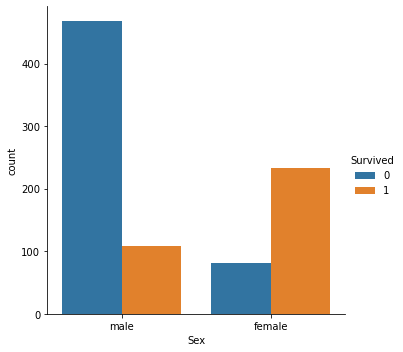

In [19]:
sns.catplot(data=df, x='Sex',kind='count', hue = 'Survived')

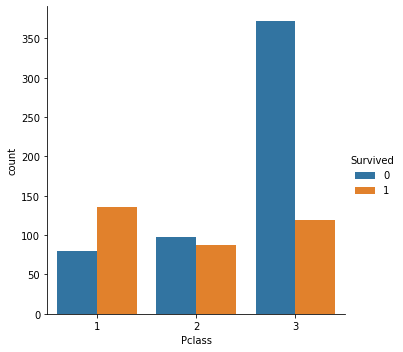

In [20]:
sns.catplot(data=df, x='Pclass', kind='count',hue='Survived')

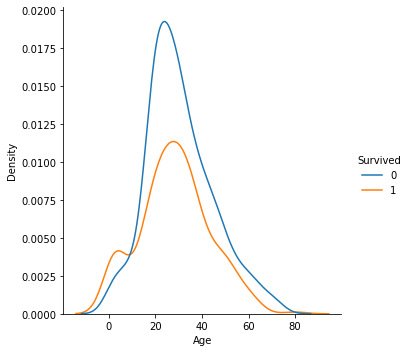

In [21]:
sns.displot(data=df, x='Age', kind='kde',hue='Survived')

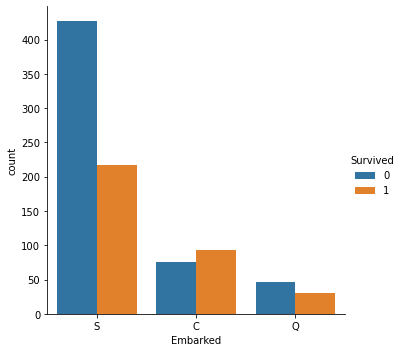

In [22]:
sns.catplot(data=df, x='Embarked', kind='count',hue='Survived')

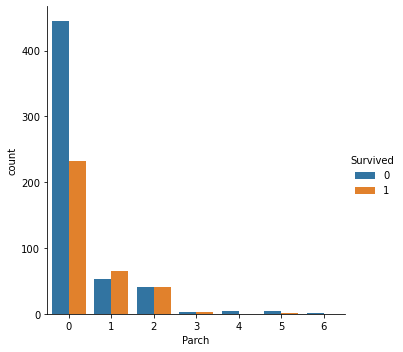

In [23]:
sns.catplot(data=df, x='Parch', kind='count',hue='Survived')

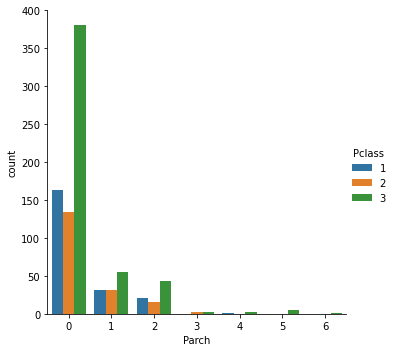

In [24]:
sns.catplot(data=df, x='Parch', kind='count',hue='Pclass')

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

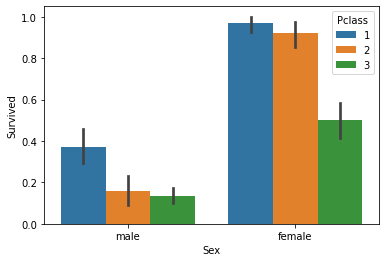

In [25]:
sns.barplot(data=df, x='Sex', y='Survived',hue='Pclass')

# The story so far

Without changing the data in anyway or running any models the data is already starting to tell its story. It is clear that female passengers had a higher chance of survival than men. This fits with the 'women and children first' idea. We could test that further by creating a new category based on age with 4 possible values, 'man, woman, boy, girl.'
The fare paid appears to indicate class of ticket and size of family. Further analysis along with ticket and cabin could possibly have a bearing if higher priced cabins were closer or had better access to the lifeboats?
3rd class passengers were the least likely to survive especially if they were men, priority seems to have been given to 1st class female passengers.

# Feature Engineering

I would like to see if the sex and age of the passenger makes a difference, so I will need to add feature to include boys and girls.

In [26]:
def age_and_sex(passenger):
    age=passenger['Age']
    sex=passenger['Sex']
    if age < 16:
        if sex == "male":
            return "boy"
        else :
            return "girl"
    else :
        return sex

df['Age_Sex'] = df.apply(age_and_sex,axis=1)

<AxesSubplot:xlabel='Age_Sex', ylabel='Survived'>

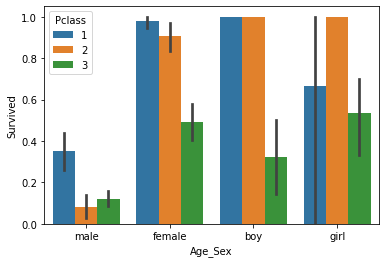

In [27]:
sns.barplot(data=df, x='Age_Sex', y='Survived',hue='Pclass')

Children, particularly 1st and 2nd class boys, seem to have been prioritised with female passengers. Again this confirms 'women and children first' but perhaps boys were favoured over girls in 1st class due to the idea of legacy.

I'm going to trim the dataframe down by removing a number of the features. Name, Ticket, PassengerId aren't neccesary to train the model and in my 1st run I'm going to ignore Parch, SibSp, Cabin, Fare, and Embarked, so I'm really looking at age, gender and class for my 1st run.

In [28]:
df = df.drop(['Name','Ticket','Parch','SibSp','Embarked','Cabin','Fare'], axis=1)

The Age column is missing some data so I will replace the missing ages with the mean age of the passengers.

In [29]:
mean_age = df['Age'].mean()
df['Age'].fillna(value=mean_age, inplace=True)

In [30]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Age_Sex
0,1,0,3,male,22.0,male
1,2,1,1,female,38.0,female
2,3,1,3,female,26.0,female
3,4,1,1,female,35.0,female
4,5,0,3,male,35.0,male


# Model

My background is in linear programming and my first thoughts for this problem are to use a decision tree where we calculate the probability of survival for each of the chosen features and calculate an overal probablity of survival for each passenger. So for my 1st attempt I will try a random forest approach.

I will first need to convert my remaining categorical data to a numeric

In [31]:
categories={"boy": 1, "male": 2, "girl": 3, "female": 4}
df['Age_Sex'] = df['Age_Sex'].map(categories)
df=df.drop(['Sex'],axis=1)

In [32]:
df.head()

,PassengerId,Survived,Pclass,Age,Age_Sex
0,1,0,3,22.0,2
1,2,1,1,38.0,4
2,3,1,3,26.0,4
3,4,1,1,35.0,4
4,5,0,3,35.0,2


(712, 4) (179, 4)
(712,) (179,)
   Accuracy: 0.770949720670391
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       106
           1       0.78      0.62      0.69        73

    accuracy                           0.77       179
   macro avg       0.77      0.75      0.75       179
weighted avg       0.77      0.77      0.77       179



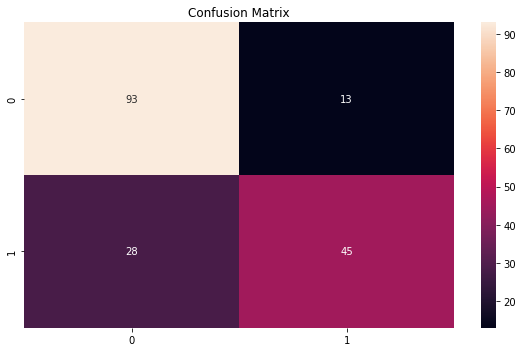

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y=df['Survived']
df=df.drop(['Survived'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

clf = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("   Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred)))

print(classification_report(y_test,y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot=True)
plt.title('Confusion Matrix')
plt.tight_layout()

# Test Data

Time to make some predictions using the test data.

In [34]:
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


We need to drop the unimportant features, create a new Age_Sex feature and clean the data as before.

In [35]:
df_test['Age_Sex'] = df_test.apply(age_and_sex,axis=1)

df_test = df_test.drop(['Name','Ticket','Parch','SibSp','Embarked','Cabin','Fare'], axis=1)

mean_age = df_test['Age'].mean()
df_test['Age'].fillna(value=mean_age, inplace=True)

categories={"boy": 1, "male": 2, "girl": 3, "female": 4}
df_test['Age_Sex'] = df_test['Age_Sex'].map(categories)
df_test=df_test.drop(['Sex'],axis=1)
df_test.head()

,PassengerId,Pclass,Age,Age_Sex
0,892,3,34.5,2
1,893,3,47.0,4
2,894,2,62.0,2
3,895,3,27.0,2
4,896,3,22.0,4


In [36]:
prediction = clf.predict(df_test)

df_test['Survival_Predictions'] = pd.Series(prediction)
df_test.head()

,PassengerId,Pclass,Age,Age_Sex,Survival_Predictions
0,892,3,34.5,2,0
1,893,3,47.0,4,0
2,894,2,62.0,2,0
3,895,3,27.0,2,0
4,896,3,22.0,4,0


Create a submission file

In [37]:
submission = pd.DataFrame()
submission['PassengerId'] = df_test['PassengerId']
submission['Survived'] = df_test['Survival_Predictions']
submission.set_index('PassengerId', inplace=True)
submission.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0


In [38]:
submission.describe()

,Survived
count,418.000000
mean,0.299043
std,0.458387
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [39]:
submission.to_csv('submission.csv',index=True)

# Conclusions

This version gave me a score of 0.78947 This isn't really surprising as I focussed on a small subset of the features. However this was a fun and informative experiment on how kaggle competitions work and how to build a data science project.

Future versions should include
* A comparison of different categorisation models
* A more in depth breakdown of some of the ignored features such as cabin, parents, siblings etc.

There are a lot of walkthroughs and tutorials to look at for this data set. I intend to study those and try again.


In [40]:
import pickle

In [41]:
pickle.dump(clf, open('titanic.pkl', 'wb'))